# Data Wrangling, Machine Learning, Model Validation With Python
Based on [Pedro Marcelino's work](https://www.kaggle.com/pmarcelino/house-prices-advanced-regression-techniques/comprehensive-data-exploration-with-python/run/879421).

----

Before attempting to train a model we need to examine the data. We divide it into the following sections:

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

We use the following tools:

- [Pandas](http://pandas.pydata.org/) for filter and filling missing data
- [Scikit Learn](http://scikit-learn.org/stable/) is a ML library with useful preprocessing capabilties
- [NumPy](http://www.numpy.org/) for manipulating N-dimension arrays
- [SciPy libraries](https://www.scipy.org/scipylib/index.html) for a set of numeric tools
- [Matplotlib](http://matplotlib.org/) for visualization
- [Seaborn](http://seaborn.pydata.org/) implements more visualization options on top of Matplotlib

When you want to know more about a function, you can use the built in documentation by putting the marker at the function an pressing __Shift__ + __Tab__

# Jupyter Notebook Tips

- `Tab` will auto-complete properties, functions and methods
- `Shift-Tab` will display documentation for property, function or methods under the caret
- `Control-Enter` will run the current selected cell
- `Alt-Enter` will run the current cell and start on next cell
- Jupyter will print result of the last line of code when running a cell. Good for testing and debugging.
- More shortcuts listed under Help-menu

In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import norm
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Fix warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
# Load the data
df_train = pd.read_csv('/data/house_prices_train.csv')

### Overview of the data
What kind of data have we loaded? Which features are numerical and which are categorical? Do we have a lot of missing data, and if so, which features are missing data? 

.info() is a very useful function that gives an overview of the data and also helps us to some extent answer some of the questions.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Most of the features are complete (not missing any data), but there some that are missing in a significant amount of the data points.

Pandas have already helped us assign a data type for each feature when it loaded the data. About half of the features are numbers while the rest are objects (=strings). This doesn't mean that half are numerical features, as some categorical features may be ordinal (have a natural order) which are represented by the number, e.g. OverallQual. 

# Analysing 'SalePrice'

'SalePrice' is what we are trying to estimate. Also known as the 'label'.

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

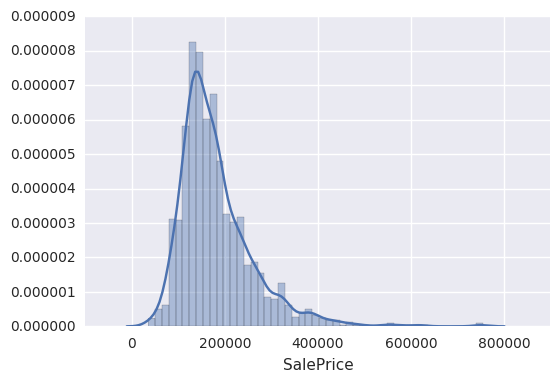

In [5]:
#histogram
sns.distplot(df_train['SalePrice']);

Histogram shows 'SalePrice' has a positive skewness and sharp peak, which results in the following values

In [6]:
# Verify skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## SalePrice in relation to features

Let's examine how 'SalePrice' is affected by a few properties (i.e. features) in the data set.

### Relationship with numerical variables

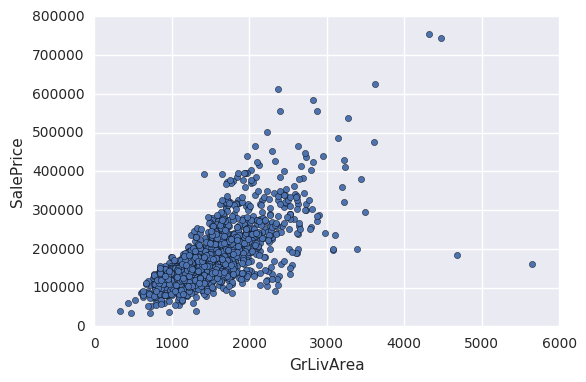

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

It seems that 'SalePrice' and 'GrLivArea' have a linear relationship.

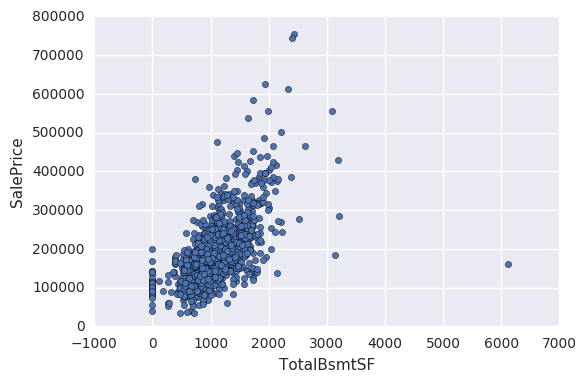

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data2 = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data2.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'TotalBsmtSF' also has a linear relationship to 'SalePrice', perhaps even exponential. There are cases where 'SalePrice' is independent of 'TotalBsmtSF'.

### Relationship with categorical features

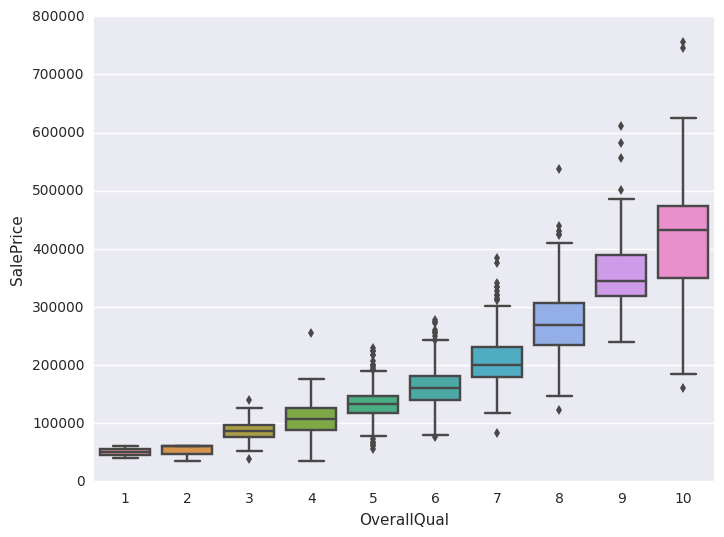

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Unsurprisingly, 'SalePrice' is increase with 'OverallQual'.

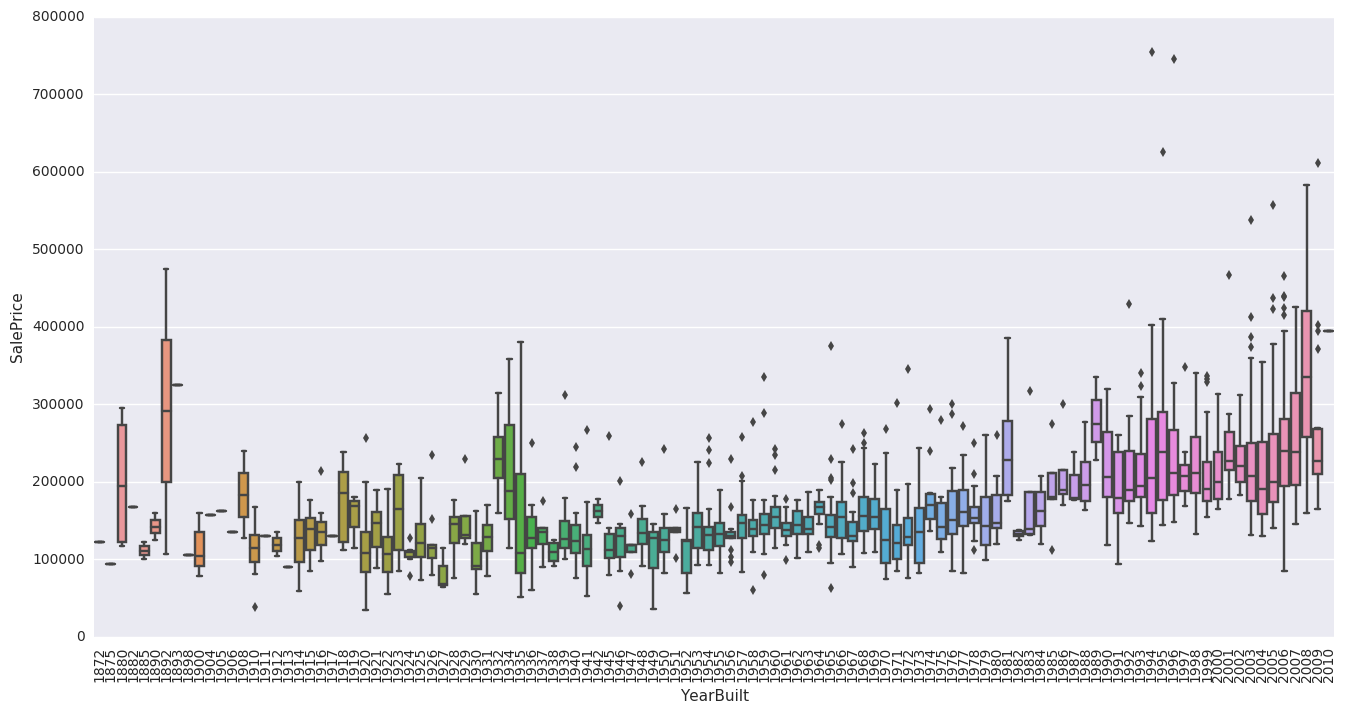

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

'YearBuilt' seem to have a limited impact on 'SalePrice'.

(-0.5, 3.5, 0, 800000)

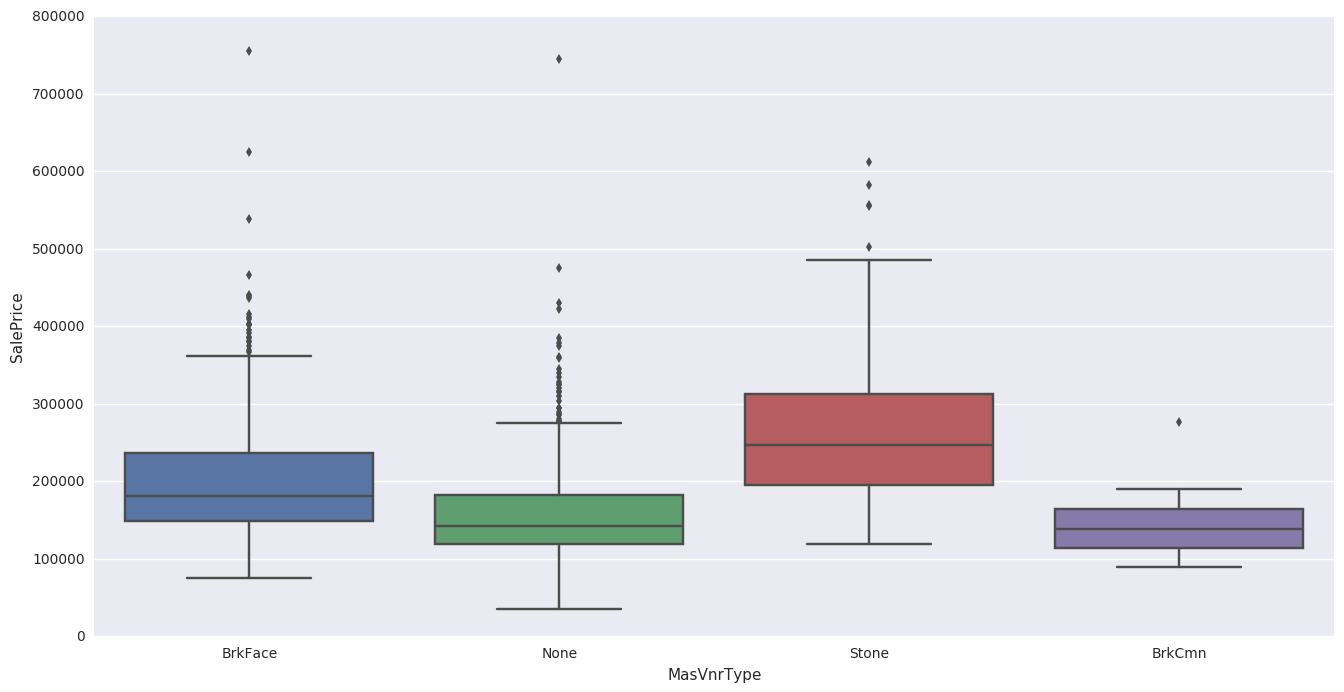

In [11]:
var = 'MasVnrType'
data = pd.concat([df_train['SalePrice'],  df_train[var].sort_values()], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

There seems to be a correlation between the mason veneer type and the price, though __'None'__ and __'BrkCmn'__ seem to be almost identical. Because this feature is a categorical text feature, we won't be able to use many of our other tools. To enable them, we encode the feature into one new column for each veneer type. But before that, we'll combine __'None'__ and __'BrkCkm'__ into one class within the feature and keep the others as is. (Note, this grouping may help the ML algorithm when training, but may also backfire and worsen the performance. We won't know until we have tried both and compared them.

Note, as can be seen when we used the .info() function to get an overview of our data set, the MasVnrType has 1452 non-null values, i.e. it's missing in 8 data points. Because we're missing so few, we'll choose to drop those data points.

When working with categorical text features, we need to encode the categories, which in this case means that we convert the feature into a numerical representation. The method we'll use is called One-hot encoding. In this method we create a new binary column for each unique category in our feature and each data point will therefore have 1 (True) in one of the new columns and 0 (False) in the rest. To do this we use the method pd.get_dummies() as it works the best for Pandas (Series or DataFrames).

In [45]:
# Combining the two classes of the mason veneer type
def combine_veneer(vnr_type):
    if vnr_type == 'None' or vnr_type == 'BrkCmn':
        return 'None_Brk'
    else:
        return vnr_type
    
# Load the data
df_train = pd.read_csv('/data/house_prices_train.csv')

# Drop the data points that dont have a value for MasVnrType
df_train = df_train[pd.notnull(df_train['MasVnrType'])].reset_index(drop=True)

# Use .map to go through the whole column and combine the 'None' and 'BrkCmn' into one class
df_train['ProcessedVnrType'] = df_train['MasVnrType'].map(combine_veneer)

# Encode features
df_train = pd.get_dummies(df_train, columns=['ProcessedVnrType'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 84 columns):
Id                           1452 non-null int64
MSSubClass                   1452 non-null int64
MSZoning                     1452 non-null object
LotFrontage                  1195 non-null float64
LotArea                      1452 non-null int64
Street                       1452 non-null object
Alley                        90 non-null object
LotShape                     1452 non-null object
LandContour                  1452 non-null object
Utilities                    1452 non-null object
LotConfig                    1452 non-null object
LandSlope                    1452 non-null object
Neighborhood                 1452 non-null object
Condition1                   1452 non-null object
Condition2                   1452 non-null object
BldgType                     1452 non-null object
HouseStyle                   1452 non-null object
OverallQual                  1452 non-null int6

## In summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
* 'MasVnrType' also seems to be related with 'SalePrice'. Because two classes in 'MasVnrType' are similar, we've chosen to group together.

We just analysed five variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

# Feature correlation to 'SalePrice'

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. 

Let's attempt a more objective analysis.

## Correlation matrix

We can calculate the correlation between features using .corr(). This calculates a matrix where each number corresponds to the correlation between one variable to another. Note that the correlation matrix is symmetrical, i.e. all the values in the matrix are mirrored with the diagonal as main axis. Also note that the correlation matrix only works with features with numbers, i.e. __numerical features and ordinal categorical features__, but also works with categorical text features if they are encoded first.

A quick way to get an overview of the relationsiphs between the feauteres is to visualize the correlation matrix a heatmap, where we draw the intensity of each correlation as a color, with a color map to tell us the intensity. Usually, the darker the color, the higher the relationship between the features. 

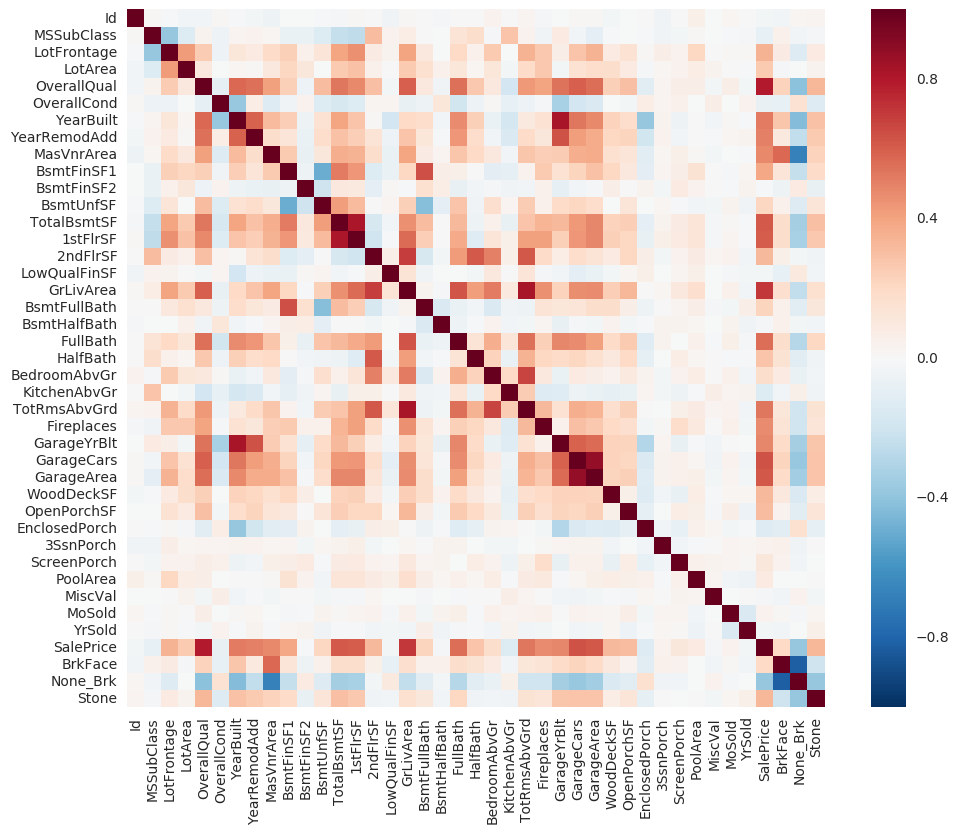

In [13]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

### 'SalePrice' correlation matrix (zoomed)


Let's look into the highest correlating features more in detail.

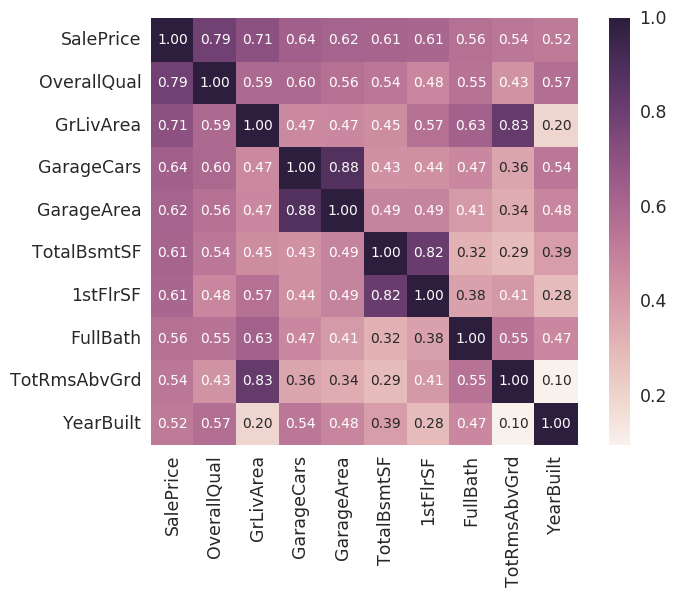

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap (including saleprice)
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. Because the number of cars that fit into the garage is a consequence of the garage area, 'GarageCars' and 'GarageArea' are strongly correlated. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be strongly correlated. We can keep 'TotalBsmtSF'.
* It seems that 'YearBuilt' is correlated with 'SalePrice' after all. It could be valueable to do a little bit of time-series analysis.
* Our encoded version of MasVnrType didn't have that big correlation with the SalePrice to be included in the top 10, so we'll drop it.

Let's proceed to the scatter plots of these features. This is done by using the sns.pairplot() function, which draws a matrix of plots, where each non diagonal graph shows a scatter plot between the intersecting features. The graphs on the diagonal are drawn as histograms instead, as there is no point to draw a scatter plot of the same variables. Once again, this tool only works for number features and not on text features.

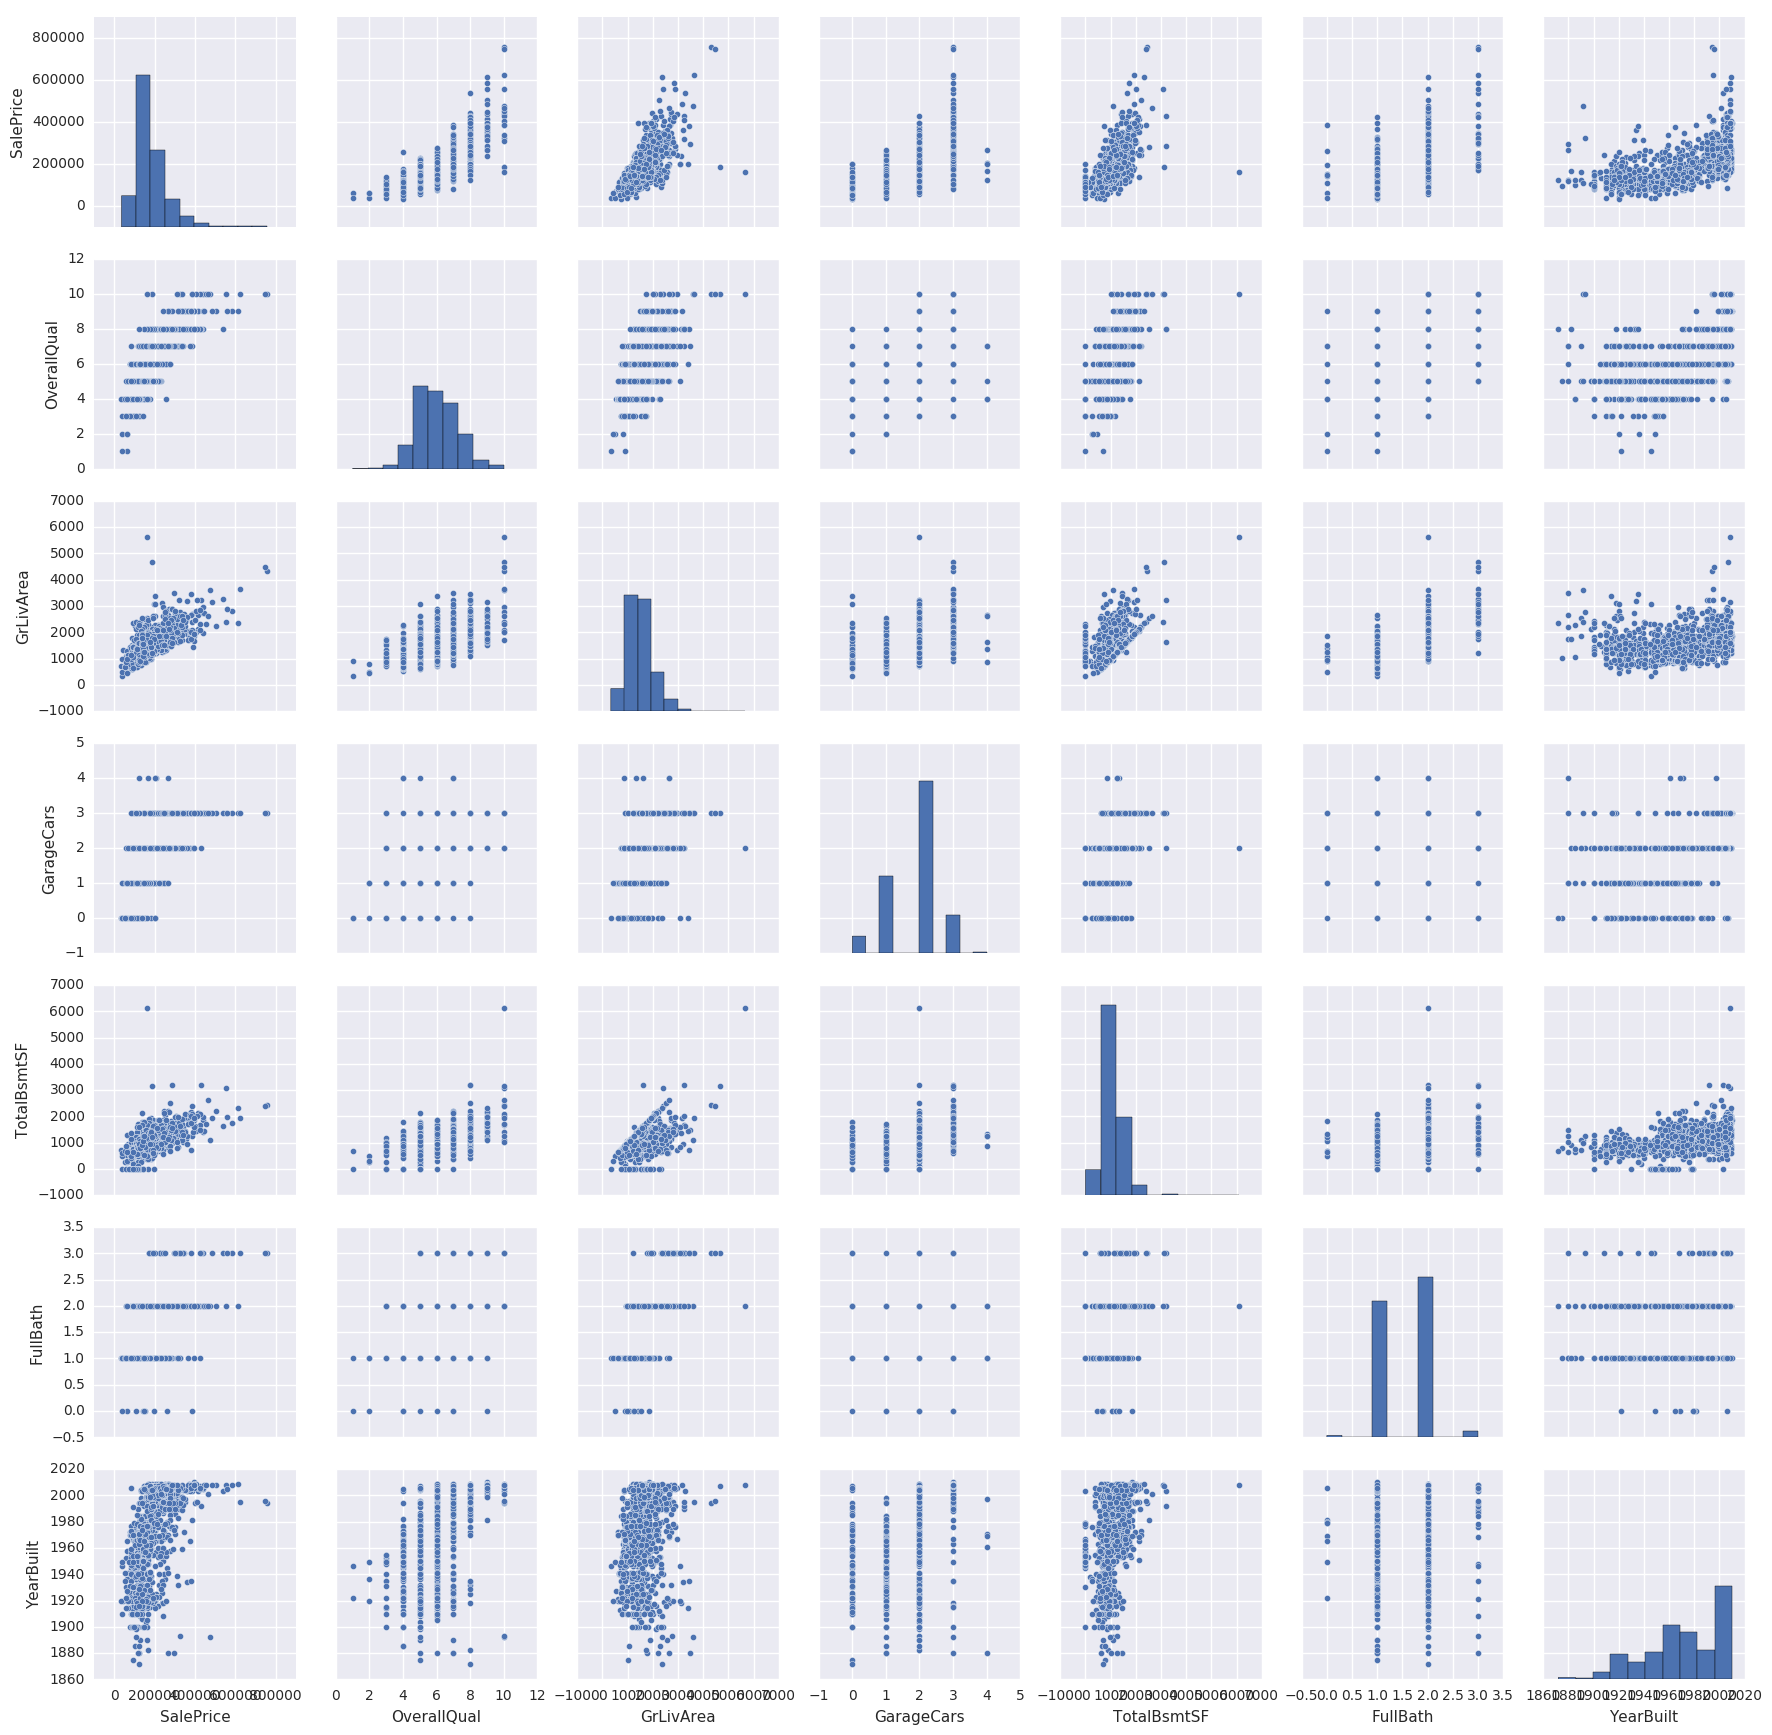

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [16]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1445,0.995179
MiscFeature,1398,0.962810
Alley,1362,0.938017
Fence,1171,0.806474
FireplaceQu,686,0.472452
LotFrontage,257,0.176997
GarageQual,81,0.055785
GarageType,81,0.055785
GarageFinish,81,0.055785
GarageYrBlt,81,0.055785


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [17]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Outliers

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis (analysis of one variable at a time)

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [18]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83798299]
 [-1.83279915]
 [-1.80014472]
 [-1.78248685]
 [-1.77365792]
 [-1.62230481]
 [-1.61599843]
 [-1.58446654]
 [-1.58446654]
 [-1.57194207]]

outer range (high) of the distribution:
[[ 3.83901988]
 [ 4.0513809 ]
 [ 4.50749611]
 [ 4.72191302]
 [ 4.74185379]
 [ 5.07422522]
 [ 5.43651411]
 [ 5.60480615]
 [ 7.11833725]
 [ 7.24446484]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis (analysis of two variables together)

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover.

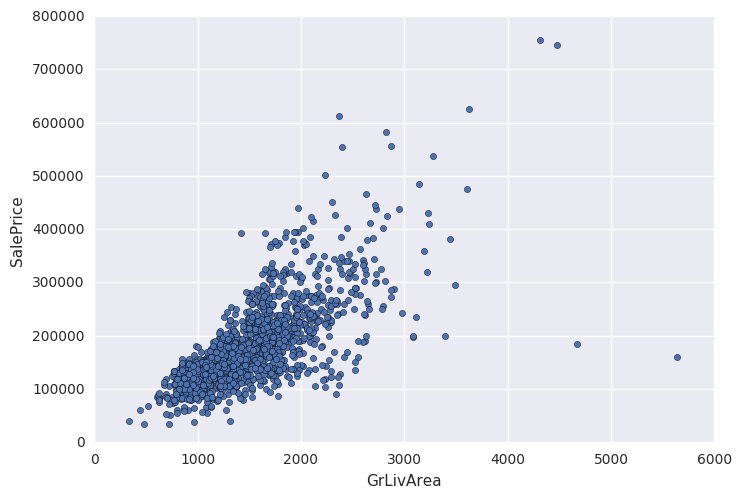

In [19]:
#bivariate analysis saleprice/grlivarea
data = df_train[['SalePrice', 'GrLivArea']]
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [20]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

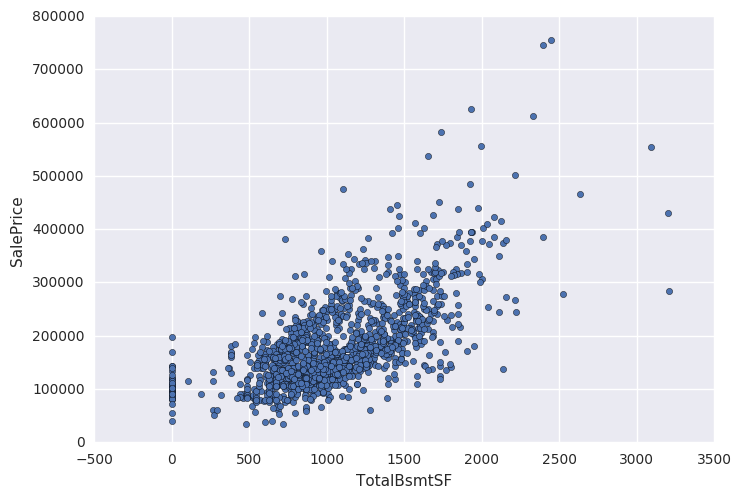

In [21]:
#bivariate analysis saleprice/grlivarea
data = df_train[['SalePrice', 'TotalBsmtSF']]
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

# 5. Getting hard core

We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

### In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

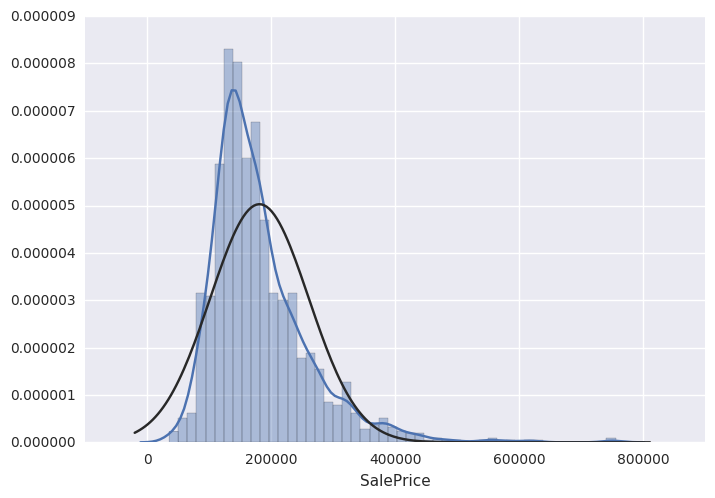

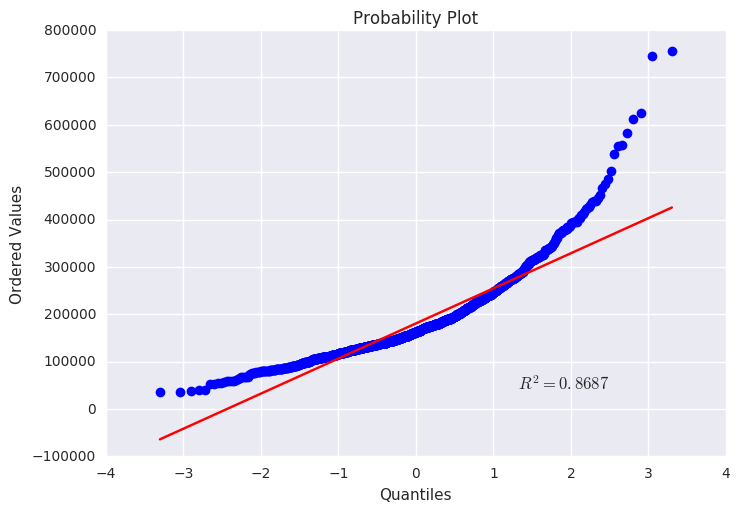

In [22]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

*Avada kedavra!*

In [23]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

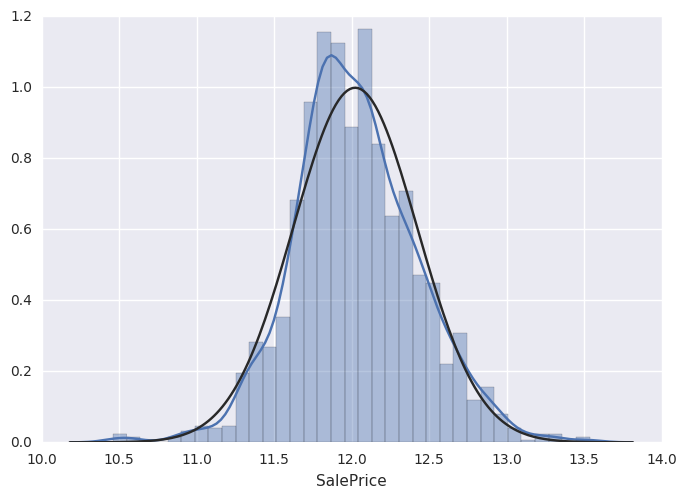

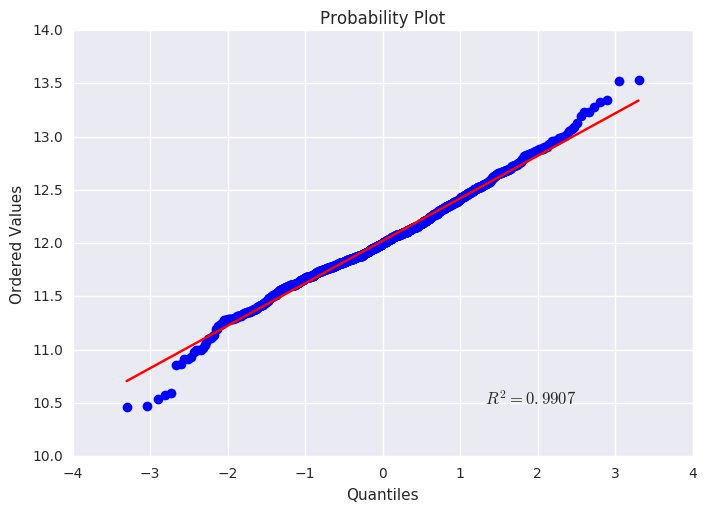

In [24]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

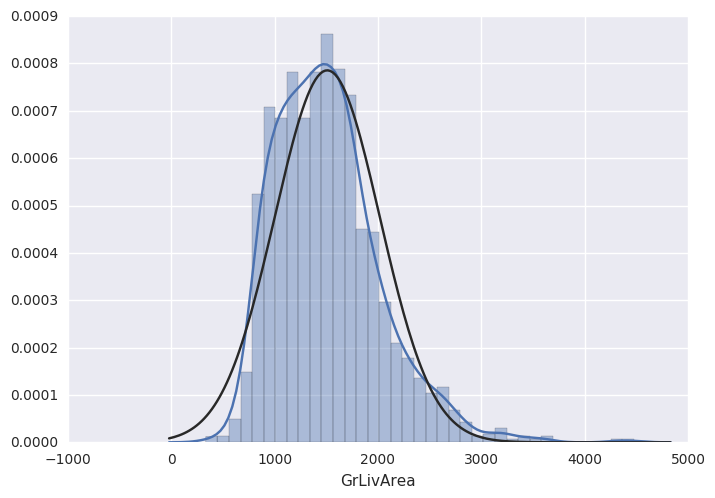

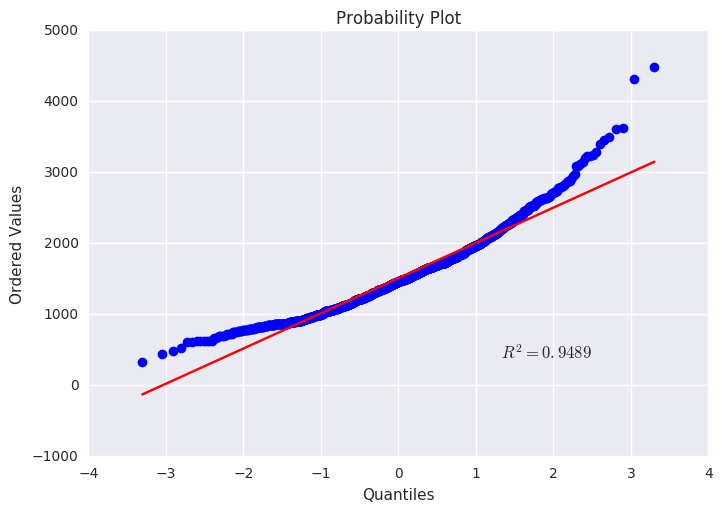

In [25]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [26]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

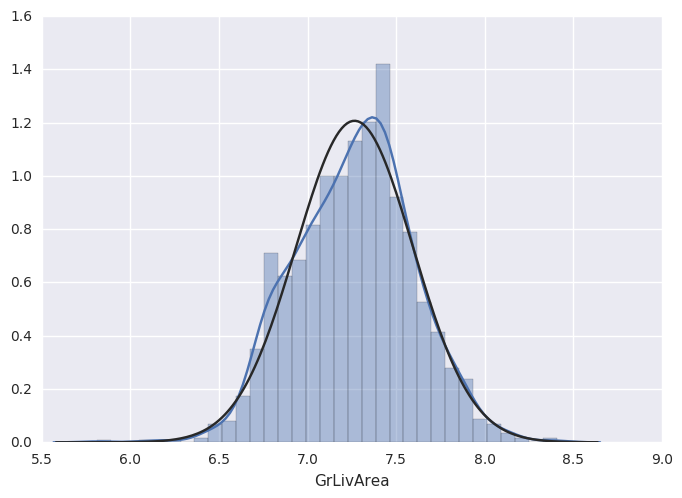

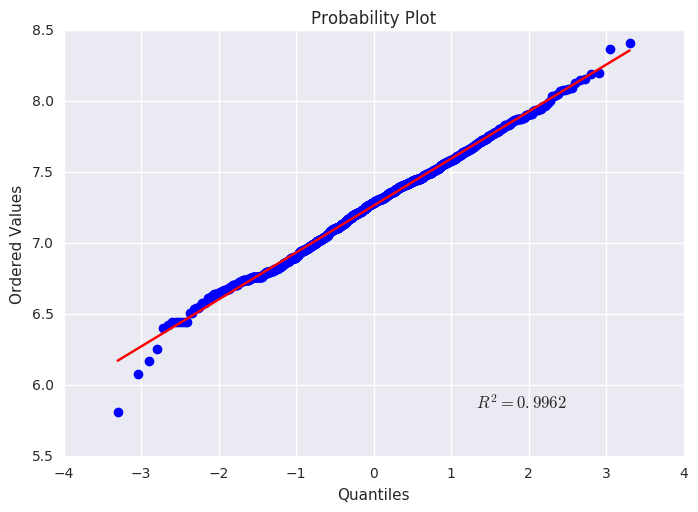

In [27]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

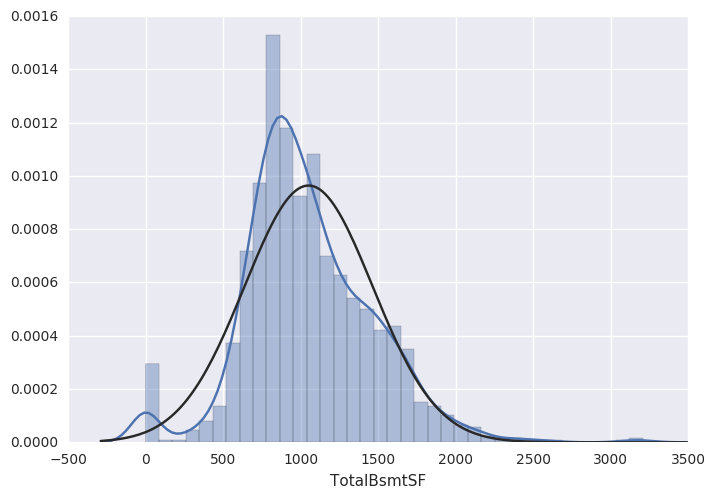

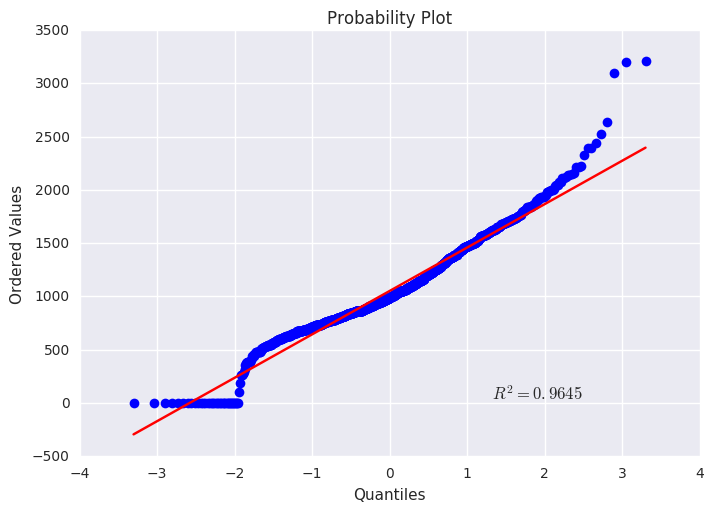

In [28]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [29]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [30]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

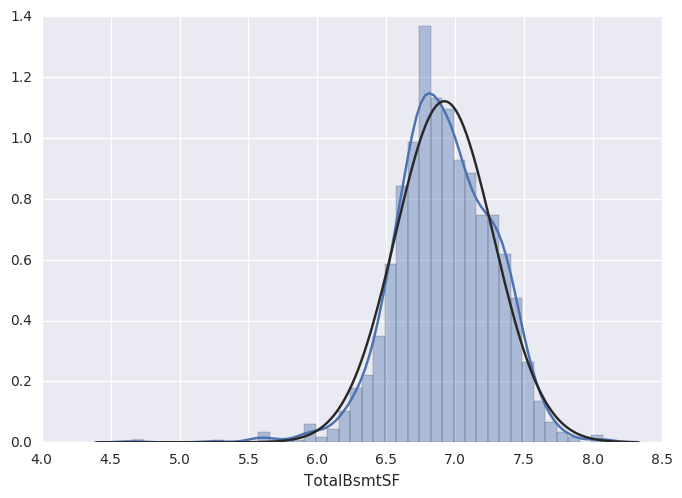

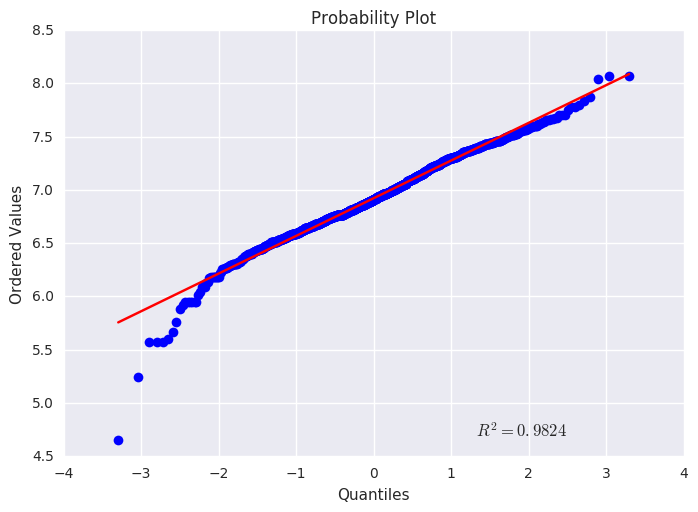

In [31]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

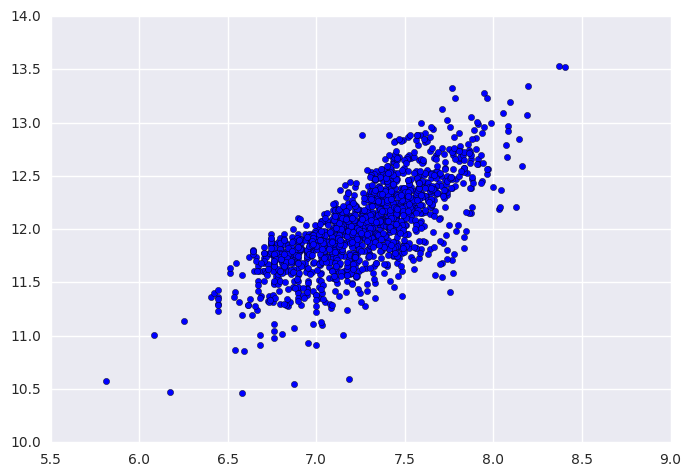

In [32]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

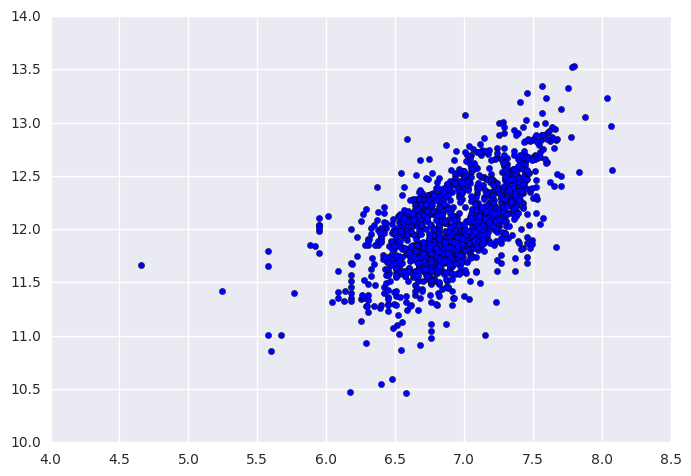

In [33]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# Part 2 - Training
Now we've finally reached the training part, which may be the easier and the harder part of a machine learning workflow, depending on the algorithm(s), amount of data and many other factors. In our case, it is mostly the easier part as we're going to use a Linear Regression model, though we could try to use other algorithms that may be more or less advanced.

Based on our analysis above, we've chosen five features to use in our linear regression model.

In [34]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
# Makes the algorithms give us the same results each time we run it
np.random.seed(12345)

# Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_train[cols], df_train['SalePrice'], test_size=0.2)

# The actual training
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

That's it, now we've trained a simple Linear Regression model using the data that we've cleaned up and preprocessed.

## Model test
Now it's time to test our model on the test set to determine the performance of our model. Because we used a transformation on our price using the log function to make it more like a normal distribution, we have to do an inverse transform to actually get a price.

There are several ways of validating a regression model. They can usually be grouped into numerical or graphical methods, where we've chosen a few from each both types. 

In [35]:
predict_test = lr.predict(X_test)

# Inverse transform of log is e^x, i.e. the exponential function
inverse_lambda = lambda x: math.exp(x)
inverse_transformer = np.vectorize(inverse_lambda)

transformed_predicted = inverse_transformer(predict_test)
y_test_transform = y_test.map(inverse_lambda)

In the case of graphical methods, we can plot the predicted value against the true value. In this graph, we want the points to be as close to the black line as possible, which would mean that each of our predicted prices were the same as the true prices.

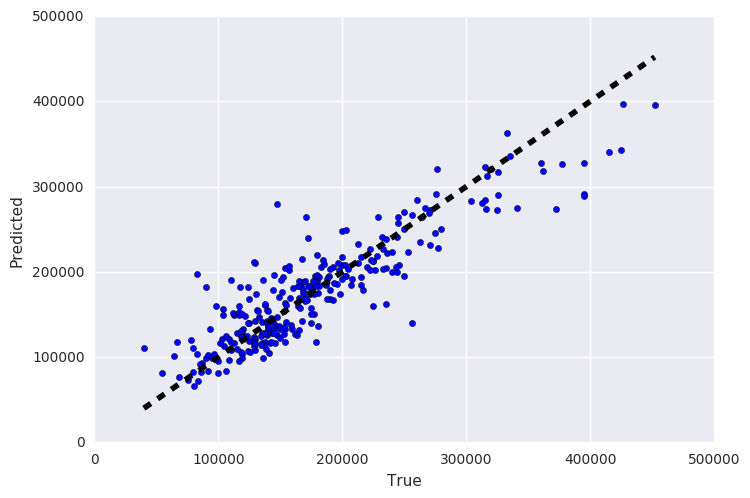

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test_transform, transformed_predicted)
ax.plot([y_test_transform.min(), y_test_transform.max()], [y_test_transform.min(), y_test_transform.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

Another graphical method is to plot the residuals, i.e. the difference between each predicted value and the corresponding true value. In this graph, we want to see if there are any patterns to the residuals. It is important that we sort the residuals according to the true price associated with it, as we want to see if the model performs better or worse in higher or lower price segments. Patterns in the residuals means that our model was not able to learn all the structure that was in the data. To solve this we can redo the data wrangling part to improve the data we send into our model, we can chose another algorithm or we can split the data into different parts where we train different models for each part.

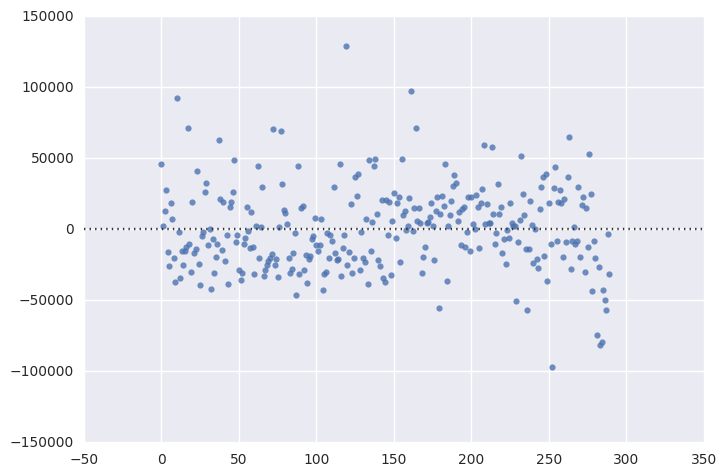

In [37]:
residuals = transformed_predicted - y_test_transform

# Need to sort the residuals according to the true price to be able to see if there are any patterns to it
pred_test_sorted, residuals_sorted = (np.asarray(list(t)) for t in zip(*sorted(zip(y_test, residuals))))

sns.residplot(np.arange(0, residuals_sorted.shape[0]), residuals_sorted)

Looking at the residuals, though there some outliers that have high values, there aren't that much of a pattern. But if we look at the actual values of the residuals, we see that the error is quite high in general, between 50k to -50k. This means that there probably are more stuff we could do to improve the model.

----

In the case numerical methods, we have the mean squared error (MSE) and the R^2 score. The MSE is just what the name suggests, you calculate the difference between each predicted value and the corresponding correct value, sum them up, and divide by the number of values. It is commonly used as a target value in training algorithms, though the actual value is not very informative when we want to analyse the model, but it can be used to compare different models, where the model with the lower score is "better". The R^2 score, sometimes aka variance score, is a number that in some sense tells us how well our model can predict the variance of our data. The R^2 score can vary between -1 and 1, where a higher value is better.

In [38]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((transformed_predicted - y_test_transform) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Mean squared error: 1087272568.48
Variance score: 0.74


# Conclusion

We're finally at the end of this example, but that doesn't mean that we're necessarily done with the data set and machine learning work. Although we have a model that can predict the price, as we can see in the model validation, it's not anywhere close to perfect. We've just started analysing and processing the data and chosen a few features to use when training our linear regression model. From here, there are several paths that we can take to improve the performance of our model. We could:

* Go through the data wrangling part again to see if there are any other ways we could process the data and pick new features.
* Pick a new machine learning algorithm to use. Here are some example that could be used: Support Vector Regressor, Elastic Net, RANSAC, Gaussian Process Regressor, Lasso regression, Random Forest Regression. Each of these algorithms require hyper parameters that need to be chosen for it to work, which makes them more or less harder to use, but they are mostly well explained in the documentation in Scikit-learn.
* Split the data set into smaller parts (up to you how to split it) where you train a new model for each part.

# The End!

# <b>References</b>
* Hair et al., 2013, Multivariate Data Analysis, 7th Edition (https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/0138132631)